In [1]:
!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install textblob



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install wordcloud



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



=== SENTIMENT ANALYSIS SUMMARY ===
Positive: 1538 tweets (43.5%)
Neutral: 1259 tweets (35.6%)
Negative: 737 tweets (20.9%)


C:\Users\naman\AppData\Local\Temp\ipykernel_27720\1368057548.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'})


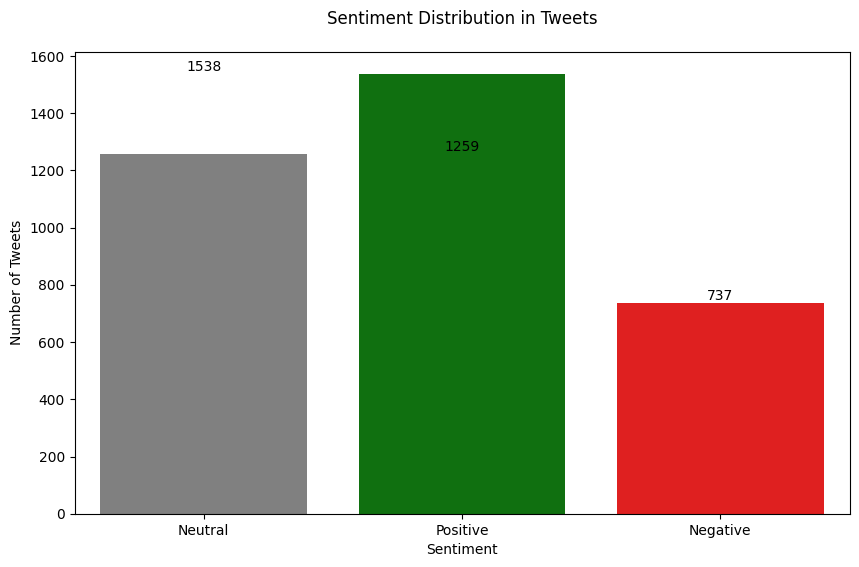


Average Subjectivity Score: 0.40

=== WORD CLOUDS ===


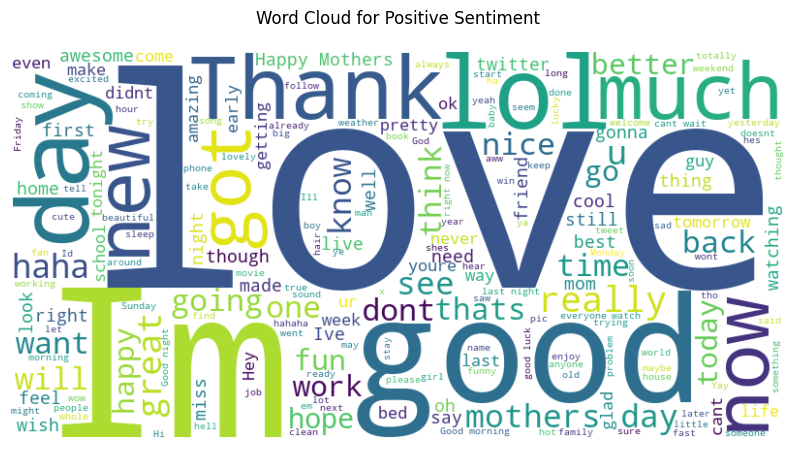

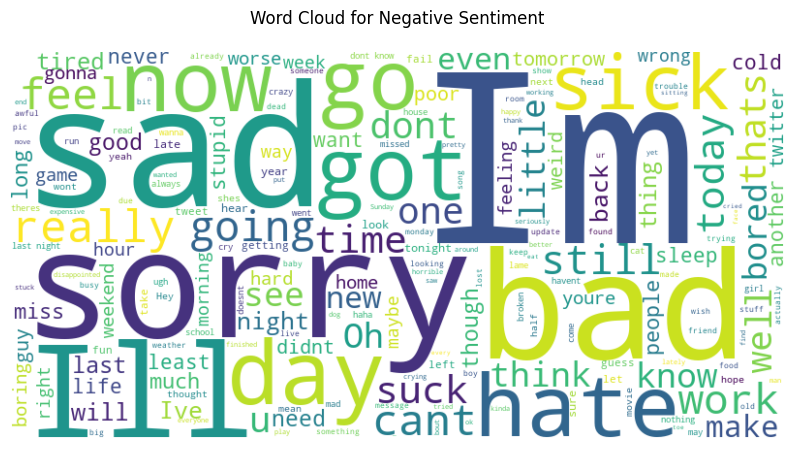

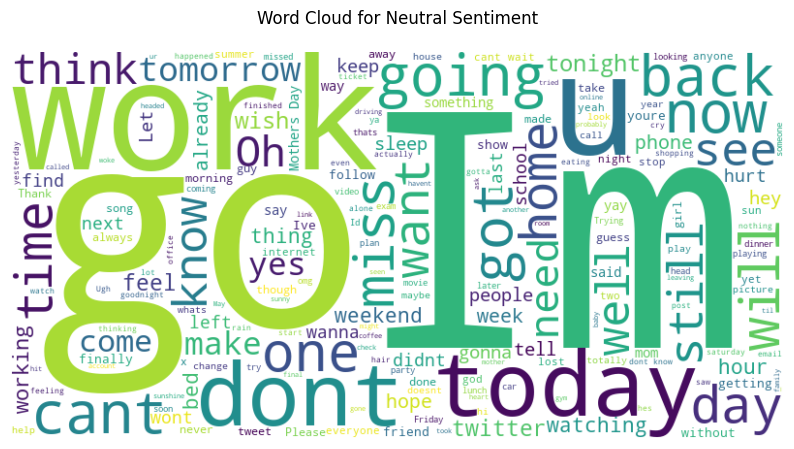


Tweet Activity by Time of Day:
mapped_time
06-09 PM    1174
06-11 AM    1178
12 PM       1176
Unknown        6
Name: count, dtype: int64


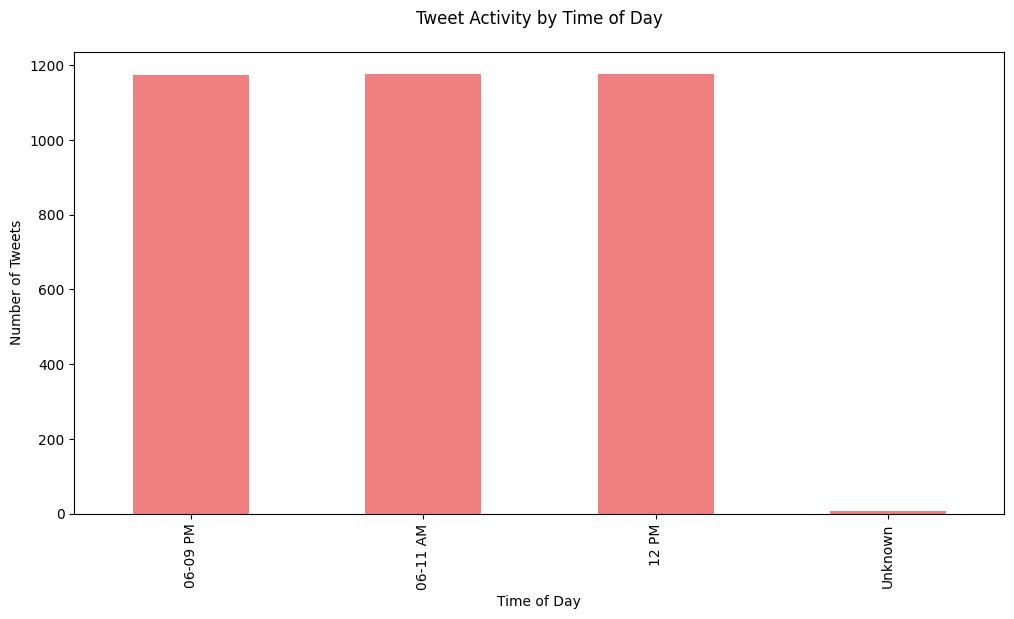


=== DEMOGRAPHIC INSIGHTS ===

Top Countries by Tweet Count:
Country
Afghanistan                  20
Colombia                     20
Congo (Congo-Brazzaville)    20
Costa Rica                   20
Croatia                      20
Name: count, dtype: int64

Average Age of Users: 46.05
Age Distribution:
Age of User
10.0    590
25.5    590
38.0    586
53.0    588
65.0    586
85.0    588
Name: count, dtype: int64

=== SAMPLE ANALYSIS ===

Original: hi  godd day eweryone im in a reel good mood to day
Cleaned : hi  godd day eweryone im in a reel good mood to day
Sentiment: Positive
Subjectivity: 0.60
Time of Tweet: morning
Age of User: 53.0
Country: Afghanistan
--------------------------------------------------------------------------------

Original:  Happy Anoop Day to you too Monica
Cleaned : Happy Anoop Day to you too Monica
Sentiment: Positive
Subjectivity: 1.00
Time of Tweet: morning
Age of User: 10.0
Country: Central African Republic
----------------------------------------------------

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

# Read the CSV file containing tweet data
df = pd.read_csv(r'D:\project 7th sem\test.csv', encoding='ISO-8859-1')

# Function to clean tweet text by removing URLs, mentions, and special characters
def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text)
    text = re.sub(r'http\S+|@\w+|#|RT[\s]+|[^\w\s]', '', text)
    return text.strip()

# Function to determine sentiment (Positive, Negative, or Neutral) using TextBlob
def get_sentiment(text):
    if not text:
        return 'Neutral'
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    return 'Neutral'

# Function to get subjectivity score
def get_subjectivity(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.subjectivity

# Mapping Time of Tweet (morning, noon, night) to respective hours
def map_time_of_tweet(time):
    if pd.isna(time):
        return 'Unknown'
    time = time.lower().strip()
    if time == 'morning':
        return '06-11 AM'
    elif time == 'noon':
        return '12 PM'
    elif time == 'night':
        return '06-09 PM'
    else:
        return 'Unknown'

# Handle Age of User column by extracting midpoint for age ranges like '0-20'
def handle_age_range(age):
    if pd.isna(age):
        return np.nan
    if isinstance(age, str) and '-' in age:
        # If the age is a range like '0-20', extract the midpoint (10)
        try:
            age_range = age.split('-')
            return (int(age_range[0]) + int(age_range[1])) / 2
        except ValueError:
            return np.nan
    try:
        # If age is a single number, return it directly
        return float(age)
    except ValueError:
        return np.nan

# Clean text, analyze sentiment, and calculate subjectivity
try:
    df['cleaned_text'] = df['text'].apply(clean_text)
    df['sentiment'] = df['cleaned_text'].apply(get_sentiment)
    df['subjectivity'] = df['cleaned_text'].apply(get_subjectivity)

    # Display sentiment distribution summary
    print("\n=== SENTIMENT ANALYSIS SUMMARY ===")
    sentiment_counts = df['sentiment'].value_counts()
    for sentiment, count in sentiment_counts.items():
        percentage = (count / len(df)) * 100
        print(f"{sentiment}: {count} tweets ({percentage:.1f}%)")

    # Plot sentiment distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='sentiment', palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'})
    plt.title('Sentiment Distribution in Tweets', pad=20)
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Tweets')

    # Add count labels on each bar
    for i, count in enumerate(sentiment_counts):
        plt.text(i, count, str(count), ha='center', va='bottom')

    plt.savefig('sentiment_distribution.png')
    plt.show()

    # Display average subjectivity
    print(f"\nAverage Subjectivity Score: {df['subjectivity'].mean():.2f}")

    # Generate and show word clouds for each sentiment category
    def plot_wordcloud(data, sentiment):
        text = ' '.join(data[data['sentiment'] == sentiment]['cleaned_text'])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment} Sentiment', pad=20)
        plt.show()

    print("\n=== WORD CLOUDS ===")
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        plot_wordcloud(df, sentiment)

    # Map 'Time of Tweet' to hour-based categories
    df['mapped_time'] = df['Time of Tweet'].apply(map_time_of_tweet)

    # Display tweet activity by time of day
    tweet_time_distribution = df['mapped_time'].value_counts().sort_index()
    print("\nTweet Activity by Time of Day:")
    print(tweet_time_distribution)

    # Plot tweet activity by time of day
    plt.figure(figsize=(12, 6))
    tweet_time_distribution.plot(kind='bar', color='lightcoral')
    plt.title('Tweet Activity by Time of Day', pad=20)
    plt.xlabel('Time of Day')
    plt.ylabel('Number of Tweets')
    plt.savefig('tweet_activity_by_time_of_day.png')
    plt.show()

    # Handle Age of User and display insights
    df['Age of User'] = df['Age of User'].apply(handle_age_range)

    print("\n=== DEMOGRAPHIC INSIGHTS ===")
    if 'Country' in df.columns:
        country_counts = df['Country'].value_counts()
        print("\nTop Countries by Tweet Count:")
        print(country_counts.head())

    if 'Age of User' in df.columns:
        age_distribution = df['Age of User'].dropna().astype(float)
        print(f"\nAverage Age of Users: {age_distribution.mean():.2f}")
        print("Age Distribution:")
        print(age_distribution.value_counts().sort_index())

    # Sample tweets analysis
    print("\n=== SAMPLE ANALYSIS ===")
    sample_data = df[['text', 'cleaned_text', 'sentiment', 'subjectivity', 'Time of Tweet', 'Age of User', 'Country']].sample(min(5, len(df)))
    for idx, row in sample_data.iterrows():
        original_text = row['text'] if pd.notna(row['text']) else "No text"
        cleaned_text = row['cleaned_text'] if row['cleaned_text'] else "No text"
        print("\nOriginal:", original_text[:100] + ('...' if len(str(original_text)) > 100 else ''))
        print("Cleaned :", cleaned_text[:100] + ('...' if len(str(cleaned_text)) > 100 else ''))
        print("Sentiment:", row['sentiment'])
        print("Subjectivity:", f"{row['subjectivity']:.2f}")
        print("Time of Tweet:", row['Time of Tweet'])
        print("Age of User:", row['Age of User'])
        print("Country:", row['Country'])
        print("-" * 80)

    # Display dataset statistics
    print("\n=== ADDITIONAL INSIGHTS ===")
    print(f"Total tweets analyzed: {len(df)}")
    print(f"Missing text entries: {df['text'].isnull().sum()}")
    print(f"Average text length: {df['cleaned_text'].str.len().mean():.1f} characters")

    # Save analyzed data to CSV
    df.to_csv('analyzed_tweets.csv', index=False)
    print("\nResults have been saved to 'analyzed_tweets.csv'")

except Exception as e:
    print(f"An error occurred: {str(e)}")

finally:
    plt.close('all')
